In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
csv_file = 'data/20240122/30d5cms3cm.csv'
df = pd.read_csv(csv_file)

# 将第一列设置为时间索引

print(df.columns)
# 绘制图表
plt.plot(df[' pitch'])
plt.plot(df[' roll'])
plt.plot(df[' yaw'])
plt.xlabel('Time')
plt.ylabel('Angle')
plt.title('Attitude')
plt.show()

Index(['timeTick', ' stateX', ' stateY', ' stateZ', ' stateVX', ' stateVY',
       ' stateVZ', ' whisker1', ' whisker2', ' whisker3', ' motor1', ' motor2',
       ' motor3', ' motor4', ' otX', ' otY', ' otZ', ' yaw', ' laserFront'],
      dtype='object')


KeyError: ' pitch'

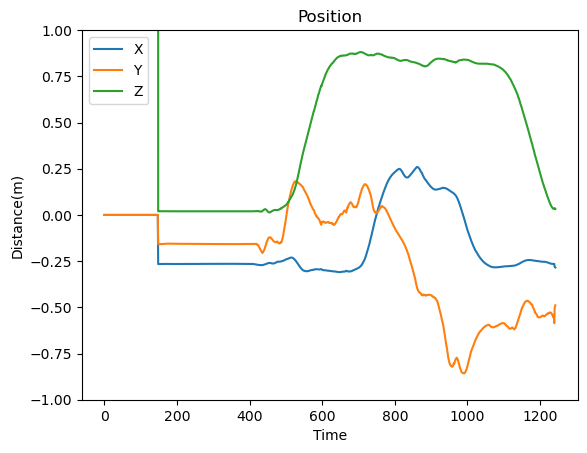

In [30]:
plt.plot(df[' stateX'],label='X')
plt.plot(df[' stateY'],label='Y')
plt.plot(df[' stateZ'],label='Z')
plt.legend()
plt.ylim(-1,1)
plt.xlabel('Time')
plt.ylabel('Distance(m)')
plt.title('Position')
plt.show()

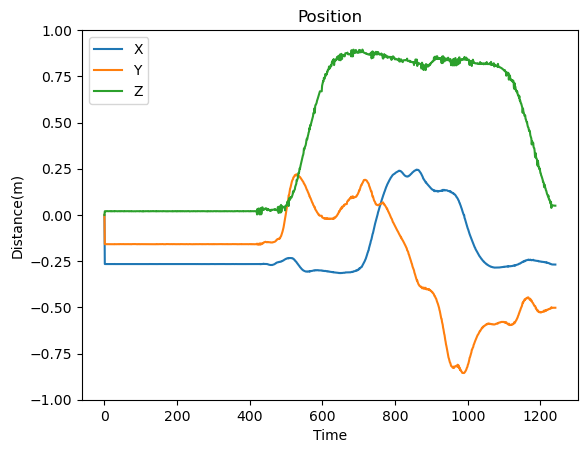

In [29]:
plt.plot(df[' otX'],label='X')
plt.plot(df[' otY'],label='Y')
plt.plot(df[' otZ'],label='Z')
plt.legend()
plt.ylim(-1,1)
plt.xlabel('Time')
plt.ylabel('Distance(m)')
plt.title('Position')
plt.show()

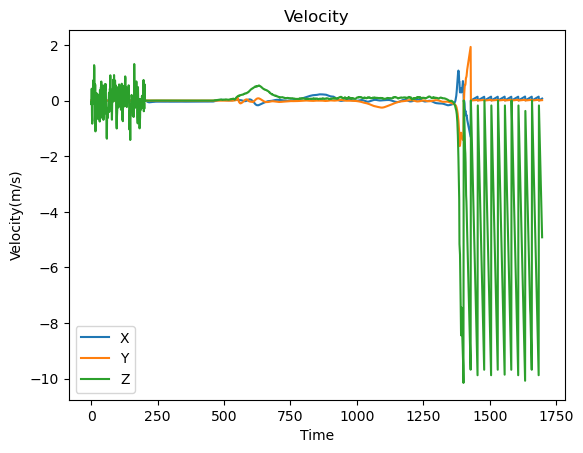

In [13]:
plt.plot(df[' stateVX'],label='X')
plt.plot(df[' stateVY'],label='Y')
plt.plot(df[' stateVZ'],label='Z')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Velocity(m/s)')
plt.title('Velocity')
plt.show()

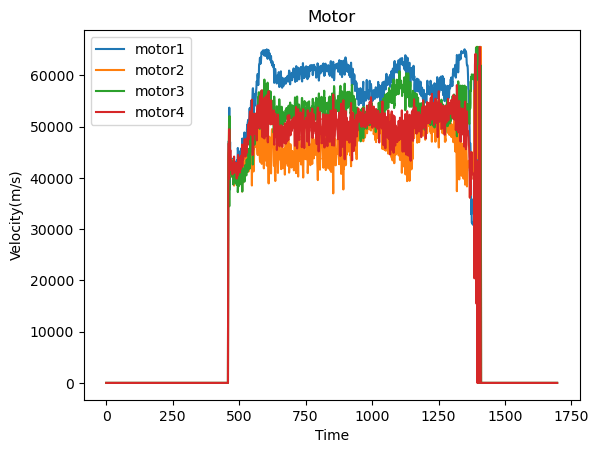

In [12]:
plt.plot(df[' motor1'],label='motor1')
plt.plot(df[' motor2'],label='motor2')
plt.plot(df[' motor3'],label='motor3')
plt.plot(df[' motor4'],label='motor4')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Velocity(m/s)')
plt.title('Motor')
plt.show()

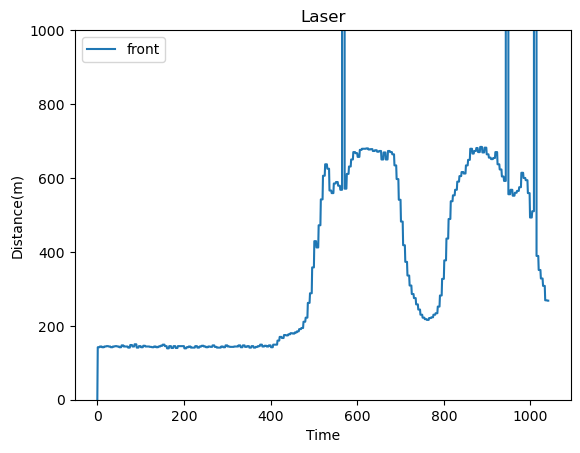

In [37]:

# 绘制图表
plt.plot(df[' laserFront'],label='front')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Distance(m)')
plt.ylim(0, 1000)
plt.title('Laser')
plt.show()

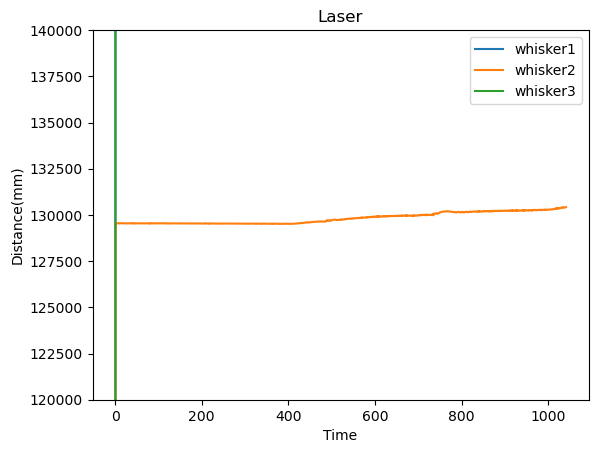

In [36]:

plt.plot(df[' whisker1'],label='whisker1')
plt.plot(df[' whisker2'],label='whisker2')
plt.plot(df[' whisker3'],label='whisker3')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Distance(mm)')
plt.ylim(120000, 140000)
plt.title('Laser')
plt.show()

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def apply_lowpass_filter(data, high_freq):
    filtered_data = np.zeros_like(data)
    for i in range(data.shape[1]):
        b, a = signal.butter(1, high_freq, 'lowpass')
        filtered_data[:, i] = signal.filtfilt(b, a, data[:, i])
    return filtered_data

def apply_bandpass_filter(number,data,low_freq,high_freq):
    filtered_data = np.zeros_like(data)
    if len(data.shape) != 2:
        b, a = signal.butter(number, [low_freq,high_freq], 'bandpass')
        filtered_data = signal.filtfilt(b, a, data)
    else:

        for i in range(data.shape[1]):
            b, a = signal.butter(1, [low_freq,high_freq], 'bandpass')
            filtered_data[:, i] = signal.filtfilt(b, a, data[:, i])
    return filtered_data

def rescale_array(array1,array2):
    scaled_array=np.zeros_like(array1)
    for i in range(array1.shape[1]):
        new_min=np.min(array1[:,i])
        new_max=np.max(array1[:,i])
        min_val = np.min(array2[:,i])
        max_val = np.max(array2[:,i])
        scaled_array[:,i] = (array2[:,i] - min_val) * (new_max - new_min) / (max_val - min_val) + new_min
    return scaled_array

[[155881.3125   144127.515625 152224.328125]
 [155879.375    144154.578125 152226.203125]
 [155863.78125  144159.484375 152237.359375]
 ...
 [157095.84375  145274.546875 153823.640625]
 [157095.84375  145277.6875   153823.640625]
 [157093.34375  145270.296875 153818.671875]]
[[ 0.36703596  1.49153948  1.09445656]
 [-4.60151476  9.07730357  2.80902216]
 [-8.34187728 14.0996801   3.97351919]
 ...
 [-1.23781592  3.99495476  1.11704262]
 [-0.62405124  2.46224632  0.5583157 ]
 [-0.20730716  0.33371324 -0.3020896 ]]


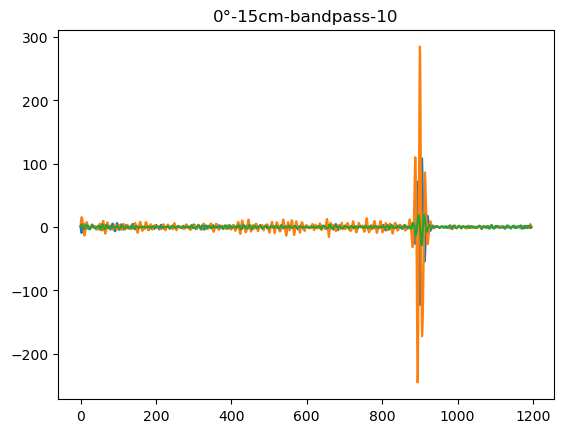

In [24]:
data = pd.read_csv('data/20240122/2024-01-22+14:01:18+optitrackstate-0。4sweep half success.csv')
pressure=data.iloc[500:-1,7:10].values
# y_placement=data.iloc[:,4].values
# force=data.iloc[:,5].values
# x_placement=data.iloc[:,6].values
# orientation=data.iloc[:,7].values

filtedData=apply_bandpass_filter(1,pressure, 0.1,0.2)
print(pressure)
print(filtedData)
plt.plot(filtedData)
# plt.plot(y_placement)
# plt.plot(force)
plt.title("0°-15cm-bandpass-10")
# plt.savefig('merged/filter/0°-15cm-bandpass-10.png')
plt.show()

Camera
Optitrack raw or kalman output
Laser range
Wall